In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

SEED = 42
np.random.seed(SEED)

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine learning/housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
# Load the data frame.head()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# Load the df = df[['median_income', 'median_house_value']]
df = df[['median_income', 'median_house_value']]
df

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0


In [ ]:
# Display dataframe information using df.info() and display df.head(10)
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_income       20640 non-null  float64
 1   median_house_value  20640 non-null  float64
dtypes: float64(2)
memory usage: 322.6 KB


,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
5,4.0368,269700.0
6,3.6591,299200.0
7,3.1200,241400.0
8,2.0804,226700.0
9,3.6912,261100.0


In [ ]:
# df.columns
# df.head()
# df.tail()
# df.info()
df.describe()

,median_income,median_house_value
count,20640.000000,20640.000000
mean,3.870671,206855.816909
std,1.899822,115395.615874
min,0.499900,14999.000000
25%,2.563400,119600.000000
50%,3.534800,179700.000000
75%,4.743250,264725.000000
max,15.000100,500001.000000


In [ ]:
# Show features that have nonzero missing values
df_na = df.isna().sum()
df_na

,0
median_income,0
median_house_value,0


In [ ]:
# Limit to categorical data
df_cat = df.select_dtypes(include=['object'])
df_cat.nunique()

,0


In [ ]:
# Limit to numerical data
df_num = df.select_dtypes(include=['number'])
df_num.nunique()

,0
median_income,12190
median_house_value,3841


In [ ]:
# Look at correlations
df_num.corr()

,median_income,median_house_value
median_income,1.000000,0.642611
median_house_value,0.642611,1.000000


In [ ]:
# Group data and sort in ascending order
df.groupby(by='median_house_value').count().sort_values('median_house_value', ascending=False).head(10)

,median_income
median_house_value,
500001.0,965
500000.0,27
499100.0,1
499000.0,1
498800.0,1
498700.0,1
498600.0,1
498400.0,1
497600.0,1


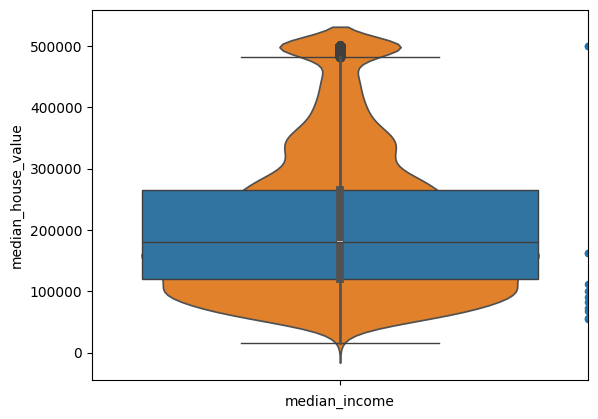

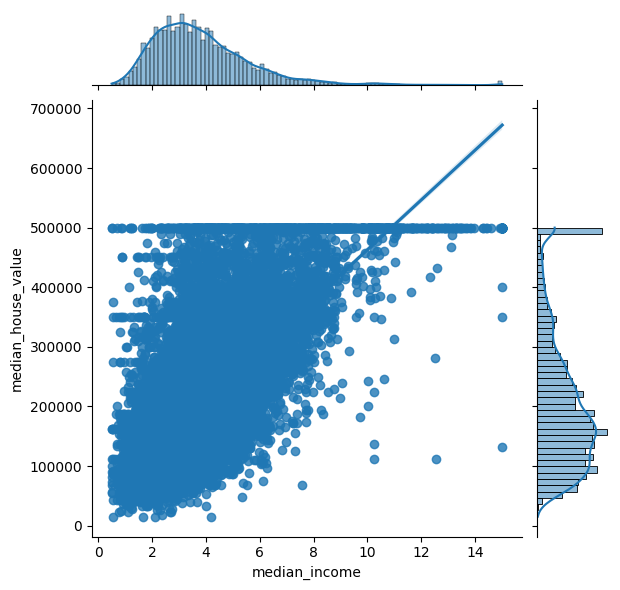

In [ ]:
# Plot data on scatter plot
df.plot.scatter('median_income', 'median_house_value')
sns.boxplot(y='median_house_value', data=df)
sns.violinplot(y='median_house_value', data=df)
sns.jointplot(x="median_income", y="median_house_value", data=df, kind="reg")

<ipython-input-41-27f56e6f6408>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['median_house_value']>500000].index, inplace=True)


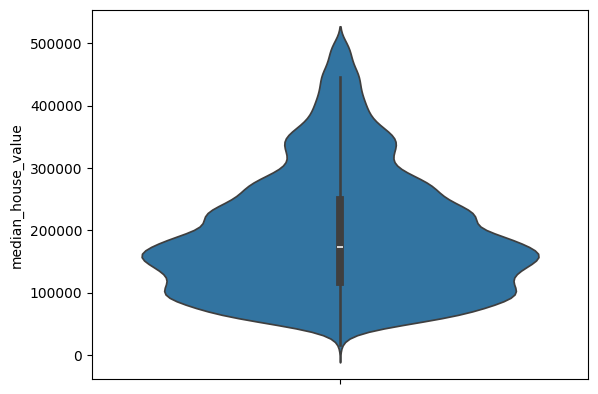

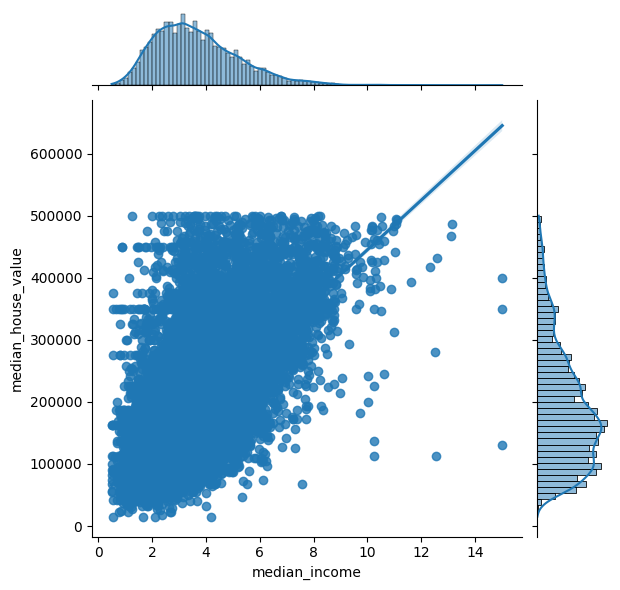

In [ ]:
# Removing outliers
df.drop(df[df['median_house_value']>500000].index, inplace=True)
sns.violinplot(y='median_house_value', data=df)
sns.jointplot(x="median_income", y="median_house_value", data=df, kind="reg")

In [ ]:
X = df.iloc[:,0].values.reshape(-1,1)
y = df.iloc[:,1].values

In [ ]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False, random_state=SEED)

In [ ]:
# Import linear regression algorithm
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)

LinearRegression()

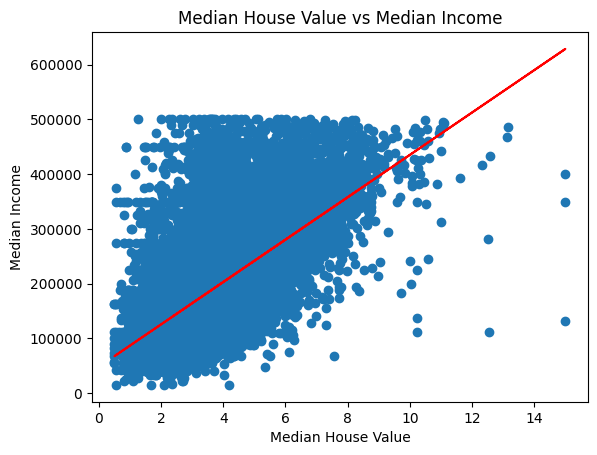

In [ ]:
# Linear regression model
line = regressor.coef_*X + regressor.intercept_

# Scatter plot
plt.scatter(X,y)
plt.plot(X, line, 'r')
plt.xlabel("Median House Value")
plt.ylabel("Median Income")
plt.title("Median House Value vs Median Income")
plt.show()
